In [1]:
#importing modules... nothing interesting
import json
import requests
from pprint import pprint
import time
import re
from bs4 import BeautifulSoup

In [3]:
#the URL
URL="https://api.nytimes.com/svc/search/v2/articlesearch.json"

In [4]:
#scrapping data (range 0-8 as there are 9 pages)

for p in range(9):
    time.sleep(5)
    payload={ 'api-key': "c574c652e3f54b7cacc3d875f5d94dfd",
             'q': "according to",
             'fq': "news_desk:(\"Politics\") AND type_of_material:(\"News\")",
             'page':p}



    try:
        ##request
        r = requests.get(URL, params=payload)
    except:
        pass
    else:
        ##response of the request
        fullData = json.loads(r.text)
        #print(fullData['response']['meta']['hits'])
        print()

        try:
            data=fullData['response']['docs']
        except:
            pprint(fullData)
        for d in data:
            print(d['pub_date'] + " - " + d['headline']['main'])
            
            #find the source
            print('\t', d['web_url'])
            
            art_html=requests.get(d['web_url']).text.lower()
            art_txt=re.sub('<[^>]*>', '', art_html)
            quotes=[]
            regex = r"according to[^.,]*.{15}"
            result = re.findall(regex, art_txt)
            for res in result:
                if res[-2]!='}':
                    r=res[:-15]
                    if r[-2:]=='st' or r[-2:]=='mr':
                        reg=r+".[^.]*"
                        quotes.append(re.findall(reg, art_txt)[0])
                    else:
                        quotes.append(r)
            for q in set(quotes):
                print('\t', q)

            time.sleep(2)
        print()
        
        #'from before)
        #for d in data:
        #    try:
        #        print(str(d['print_page']) + " - " + str(d['headline']['print_headline']))
        #    except:
        #        print(". - " + str(d['headline']['print_headline']))

        #for d in data:
        #    print(d['snippet'])


#==> could get a lot more data then what is printed


2018-05-30T00:25:39+0000 - Who Is Mike Parson, Missouri’s New Governor?
	 https://www.nytimes.com/2018/05/29/us/politics/mike-parson-missouri.html
	 according to the st. louis post-dispatch
	 according to his official state biography
2018-05-23T00:06:56+0000 - Amy McGrath, Once a Fighter Pilot, Wins Democratic Primary for Kentucky’s 6th District
	 https://www.nytimes.com/2018/05/22/us/politics/kentucky-election-mcgrath.html
	 according to the associated press
2018-04-28T15:30:04+0000 - Trump’s Role in Midterm Elections Roils Republicans
	 https://www.nytimes.com/2018/04/28/us/politics/trump-midterm-elections.html
	 according to multiple republicans
	 according to multiple attendees
	 according to two advisers
	 according to advisers
	 according to multiple officials briefed on the conversation
2018-05-14T16:14:20+0000 - Pence Is Trying to Control Republican Politics. Trump Aides Aren’t Happy.
	 https://www.nytimes.com/2018/05/14/us/politics/pence-trump-midterms.html
	 according to a p

2018-04-21T15:06:07+0000 - Fearing Chaos, National Democrats Plunge Into Midterm Primary Fights
	 https://www.nytimes.com/2018/04/21/us/politics/democrats-house-midterms-california.html
	 according to people briefed on the group’s strategy
2018-02-01T22:53:05+0000 - Fact Check: Democratic Responses to Trump’s State of the Union
	 https://www.nytimes.com/2018/02/01/us/politics/fact-check-democrats-state-of-the-union.html
	 according to even broader data from the bureau of labor statistics
	 according to the congressional budget office
2018-01-03T00:59:50+0000 - Trump’s Aviation Boast Fails to Get in the Air
	 https://www.nytimes.com/2018/01/02/us/politics/fact-check-trump-aviation-safety.html
	 according to the national transportation safety board
2018-03-20T15:52:56+0000 - Mississippi Governor Defies White House With His G.O.P. Appointee to Senate
	 https://www.nytimes.com/2018/03/20/us/politics/mississippi-senate-appointee-trump.html
	 according to republicans familiar with the discus

2016-06-02T00:00:00Z - Clinton and Trump in Tight Race, Poll Shows, With Votes Split on Gender Lines
	 https://www.nytimes.com/2016/06/02/us/politics/clinton-trump-poll.html
	 according to a poll released on wednesday that shows united states voters sharply divided along gender and party lines
2016-07-14T00:00:00Z - Polls in 3 Crucial States Show Donald Trump Improving
	 https://www.nytimes.com/2016/07/14/us/politics/donald-trump-hillary-clinton-polls-swing-states.html
	 according to new polls showing the presumptive republican presidential nominee gaining strength on his democratic rival because of doubts about her honesty
2016-05-26T00:00:00Z - Donald Trump Dismisses National Political Director After 6 Weeks on the Job
	 https://www.nytimes.com/2016/05/26/us/politics/trump-rick-wiley-campaign.html
	 according to an aide
2016-06-02T00:00:00Z - Hispanic Official to Leave R.N.C. in Sign of Disaffection With Donald Trump
	 https://www.nytimes.com/2016/06/02/us/politics/rnc-trump-ruth-gue

Aviable data for each article:

In [6]:
for k in data[0].keys():
    print(k, ':', data[0][k])
    print('-')

snippet : TAMPA, Fla. - A confrontation between a television producer  and Sheldon Adelson's  daughter, captured on video, illustrates escalating tensions as the news media tries to scrutinize the mega-donors who are pouring millions into the presidential r...
-
print_page : 17
-
score : 7.31682e-11
-
document_type : article
-
web_url : https://query.nytimes.com/gst/fullpage.html?res=9407EFD8173CF932A0575BC0A9649D8B63
-
blog : {}
-
word_count : 395
-
source : The New York Times
-
type_of_material : News
-
keywords : [{'name': 'creative_works', 'value': 'DEMOCRACY NOW (TV PROGRAM)', 'major': None, 'rank': 0}, {'name': 'persons', 'value': 'ADELSON, SHELDON G', 'major': None, 'rank': 0}, {'name': 'subject', 'value': 'TELEVISION', 'major': None, 'rank': 0}, {'name': 'subject', 'value': 'CAMPAIGN FINANCE', 'major': None, 'rank': 0}, {'name': 'subject', 'value': 'REPUBLICAN NATIONAL CONVENTION', 'major': None, 'rank': 0}, {'name': 'subject', 'value': 'NEWS AND NEWS MEDIA', 'major': None, 'ra

=> to get what follows "according to", I had to get the full article from the web_url and searh specifically for it...

-- 

trying to get datetimes objects:

In [7]:
from datetime import datetime
import pandas as pd
from pandas import DataFrame, Series

In [13]:
dates=["2012-08-31", "2012-09-14", "2012-09-12", "2012-09-08", "2012-09-07", "2012-09-15", "2012-08-29", "2012-11-23", \
 "2012-09-11", "2012-07-09"]
d=[datetime.strptime(i, '%Y-%m-%d') for i in dates]

d

[datetime.datetime(2012, 8, 31, 0, 0),
 datetime.datetime(2012, 9, 14, 0, 0),
 datetime.datetime(2012, 9, 12, 0, 0),
 datetime.datetime(2012, 9, 8, 0, 0),
 datetime.datetime(2012, 9, 7, 0, 0),
 datetime.datetime(2012, 9, 15, 0, 0),
 datetime.datetime(2012, 8, 29, 0, 0),
 datetime.datetime(2012, 11, 23, 0, 0),
 datetime.datetime(2012, 9, 11, 0, 0),
 datetime.datetime(2012, 7, 9, 0, 0)]

In [28]:
#scrapping data (range 0-8 as there are 9 pages)
file=open('data.csv', 'w', encoding='utf-8')
file.write('date,title,nb\n')

for p in range(9):
    time.sleep(1)
    payload={ 'api-key': "c574c652e3f54b7cacc3d875f5d94dfd",
             'q': "according to",
             'fq': "news_desk:(\"Politics\") AND type_of_material:(\"News\")",
             'page':p}



    try:
        ##request
        r = requests.get(URL, params=payload)
    except:
        pass
    else:
        ##response of the request
        fullData = json.loads(r.text)
        #print(fullData['response']['meta']['hits'])
        print()

        try:
            data=fullData['response']['docs']
        except:
            pprint(fullData)
        for d in data:
            print(d['pub_date'][:10] + "," + d['headline']['main'])
            file.write(d['pub_date'][:10] + "," + d['headline']['main'].replace(',', ';') + ',1\n')
file.close()
#==> could get a lot more data then what is printed


2018-05-30,Who Is Mike Parson, Missouri’s New Governor?
2018-05-23,Amy McGrath, Once a Fighter Pilot, Wins Democratic Primary for Kentucky’s 6th District
2018-04-28,Trump’s Role in Midterm Elections Roils Republicans
2018-05-14,Pence Is Trying to Control Republican Politics. Trump Aides Aren’t Happy.
2018-05-31,Never Mind the News Media: Politicians Test Direct-to-Voter Messaging
2018-05-25,Concerned by Trump, Some Republicans Quietly Align With Democrats
2018-05-09,Democrats in Rust Belt: Stay Close to Trump, but Not Too Close
2018-05-23,Stacey Abrams Wins Georgia Democratic Primary for Governor, Making History
2018-04-25,Don Blankenship Is a West Virginia Senate Candidate. He Lives in Nevada.
2018-05-21,Hillary and Bill Clinton Go Separate Ways for 2018 Midterm Elections

2018-03-21,Denounced by His Party as a Nazi, Arthur Jones Wins Illinois G.O.P. Congressional Primary
2018-05-07,Trump Weighs In on West Virginia Senate Race in Sign of Republican Anxiety
2018-05-27,The Evangelical 

In [29]:
data=pd.read_csv('data.csv', parse_dates=True, index_col=0)# columns=['dates', 'titles'])
data

,title,nb
date,,
2018-05-30,Who Is Mike Parson; Missouri’s New Governor?,1
2018-05-23,Amy McGrath; Once a Fighter Pilot; Wins Democr...,1
2018-04-28,Trump’s Role in Midterm Elections Roils Republ...,1
2018-05-14,Pence Is Trying to Control Republican Politics...,1
2018-05-31,Never Mind the News Media: Politicians Test Di...,1
2018-05-25,Concerned by Trump; Some Republicans Quietly A...,1
2018-05-09,Democrats in Rust Belt: Stay Close to Trump; b...,1
2018-05-23,Stacey Abrams Wins Georgia Democratic Primary ...,1
2018-04-25,Don Blankenship Is a West Virginia Senate Cand...,1


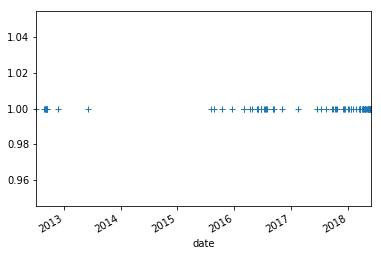

In [33]:
import matplotlib.pyplot as plt
data['nb'].plot(style='+')
plt.show()

In [ ]:
data